##  IPL Batting Performance Analysis – Exploratory Data Analysis (EDA)

The Indian Premier League (IPL) has witnessed some of the finest batting performances across different match phases — from explosive starts in the powerplay to steady control in the middle overs and fearless hitting at the death.  
This Exploratory Data Analysis (EDA) aims to uncover **how top IPL batters perform across various stages of an innings**, focusing on their **average, strike rate, and consistency trends**.

By breaking down the analysis into **Powerplay (1–6 overs)**, **Middle Overs (7–15)**, and **Death Overs (16–20)**, we can identify distinct player profiles — such as stable anchors, aggressive openers, and finishers.  
Each phase is visualized using scatter plots comparing **Batting Average** and **Strike Rate**, along with quadrant-based insights to highlight players performing above or below the mean benchmarks.

The EDA not only helps in understanding **individual strengths and playing styles**, but also provides a comparative perspective on how legends like **Virat Kohli, KL Rahul, David Warner, and MS Dhoni** adapt their approach depending on match context and overs remaining.

Overall, this analysis delivers a data-driven look into:
- Performance segmentation by match phase.  
- Key batters excelling in specific overs.  
- Statistical trade-offs between aggression and consistency.  
- Visual insights to support player strategy and team composition.

---


In [330]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
df=pd.read_csv(r'D:\EDA\deliveries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [331]:
#GETTING THE DATA OF TOP 20 RUNS SCORERS IN IPL 
df_top_run_scorers=df.groupby('batter')['batsman_runs'].sum().reset_index(name='Total_Runs')
df_top_run_scorers=df_top_run_scorers.sort_values(by='Total_Runs',ascending=False).head(20)
df_top_run_scorers

,batter,Total_Runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


In [332]:
#MAPPING TEAM COLORS TO TEAM
team_colors = {
    'Royal Challengers Bengaluru': '#DA1818',# Red
    'Mumbai Indians': '#003B7A',  
    'Delhi Capitals': '#17449B', # Darker Blue
    'Chennai Super Kings': '#F6D519', # Yellow
    'Kolkata Knight Riders': '#3B0A45', # Purple
    'Sunrisers Hyderabad': '#E65A2C', # Orange
    'Rajasthan Royals': '#EA1A8E', # Pink
    'Lucknow Super Giants': '#00AEEF', 
    'Gujarat Titans': '#1B2133', 
    'Punjab Kings': '#D71920' 
}
player_team_map = { 
    'V Kohli': 'Royal Challengers Bengaluru',
    'S Dhawan': 'Sunrisers Hyderabad',
    'RG Sharma': 'Mumbai Indians',
    'DA Warner': 'Sunrisers Hyderabad',
    'SK Raina': 'Chennai Super Kings',
    'MS Dhoni': 'Chennai Super Kings',
    'AB de Villiers': 'Royal Challengers Bengaluru',
    'CH Gayle': 'Royal Challengers Bengaluru',
    'RV Uthappa': 'Kolkata Knight Riders',
    'KD Karthik': 'Kolkata Knight Riders',
    'KL Rahul': 'Punjab Kings',
    'AM Rahane': 'Rajasthan Royals',
    'F du Plessis': 'Chennai Super Kings',
    'SV Samson': 'Rajasthan Royals',
    'AT Rayudu': 'Chennai Super Kings',
    'G Gambhir': 'Kolkata Knight Riders',
    'SR Watson': 'Chennai Super Kings',
    'MK Pandey': 'Kolkata Knight Riders',
    'SA Yadav': 'Mumbai Indians',
    'JC Buttler': 'Rajasthan Royals'
}

df_top_run_scorers['Team']=df_top_run_scorers['batter'].map(player_team_map)
df_top_run_scorers


,batter,Total_Runs,Team
631,V Kohli,8014,Royal Challengers Bengaluru
512,S Dhawan,6769,Sunrisers Hyderabad
477,RG Sharma,6630,Mumbai Indians
147,DA Warner,6567,Sunrisers Hyderabad
546,SK Raina,5536,Chennai Super Kings
374,MS Dhoni,5243,Chennai Super Kings
30,AB de Villiers,5181,Royal Challengers Bengaluru
124,CH Gayle,4997,Royal Challengers Bengaluru
501,RV Uthappa,4954,Kolkata Knight Riders
282,KD Karthik,4843,Kolkata Knight Riders


In [333]:
#Creating a Patch for Legend
legend_teams=df_top_run_scorers['Team'].unique()
legend_teams
legend_team_patch=[Patch(facecolor=team_colors[team_name],
                   label=team_name)
                   for team_name in legend_teams
                   ]


C:\Users\vansh\AppData\Local\Temp\ipykernel_12652\2036264439.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


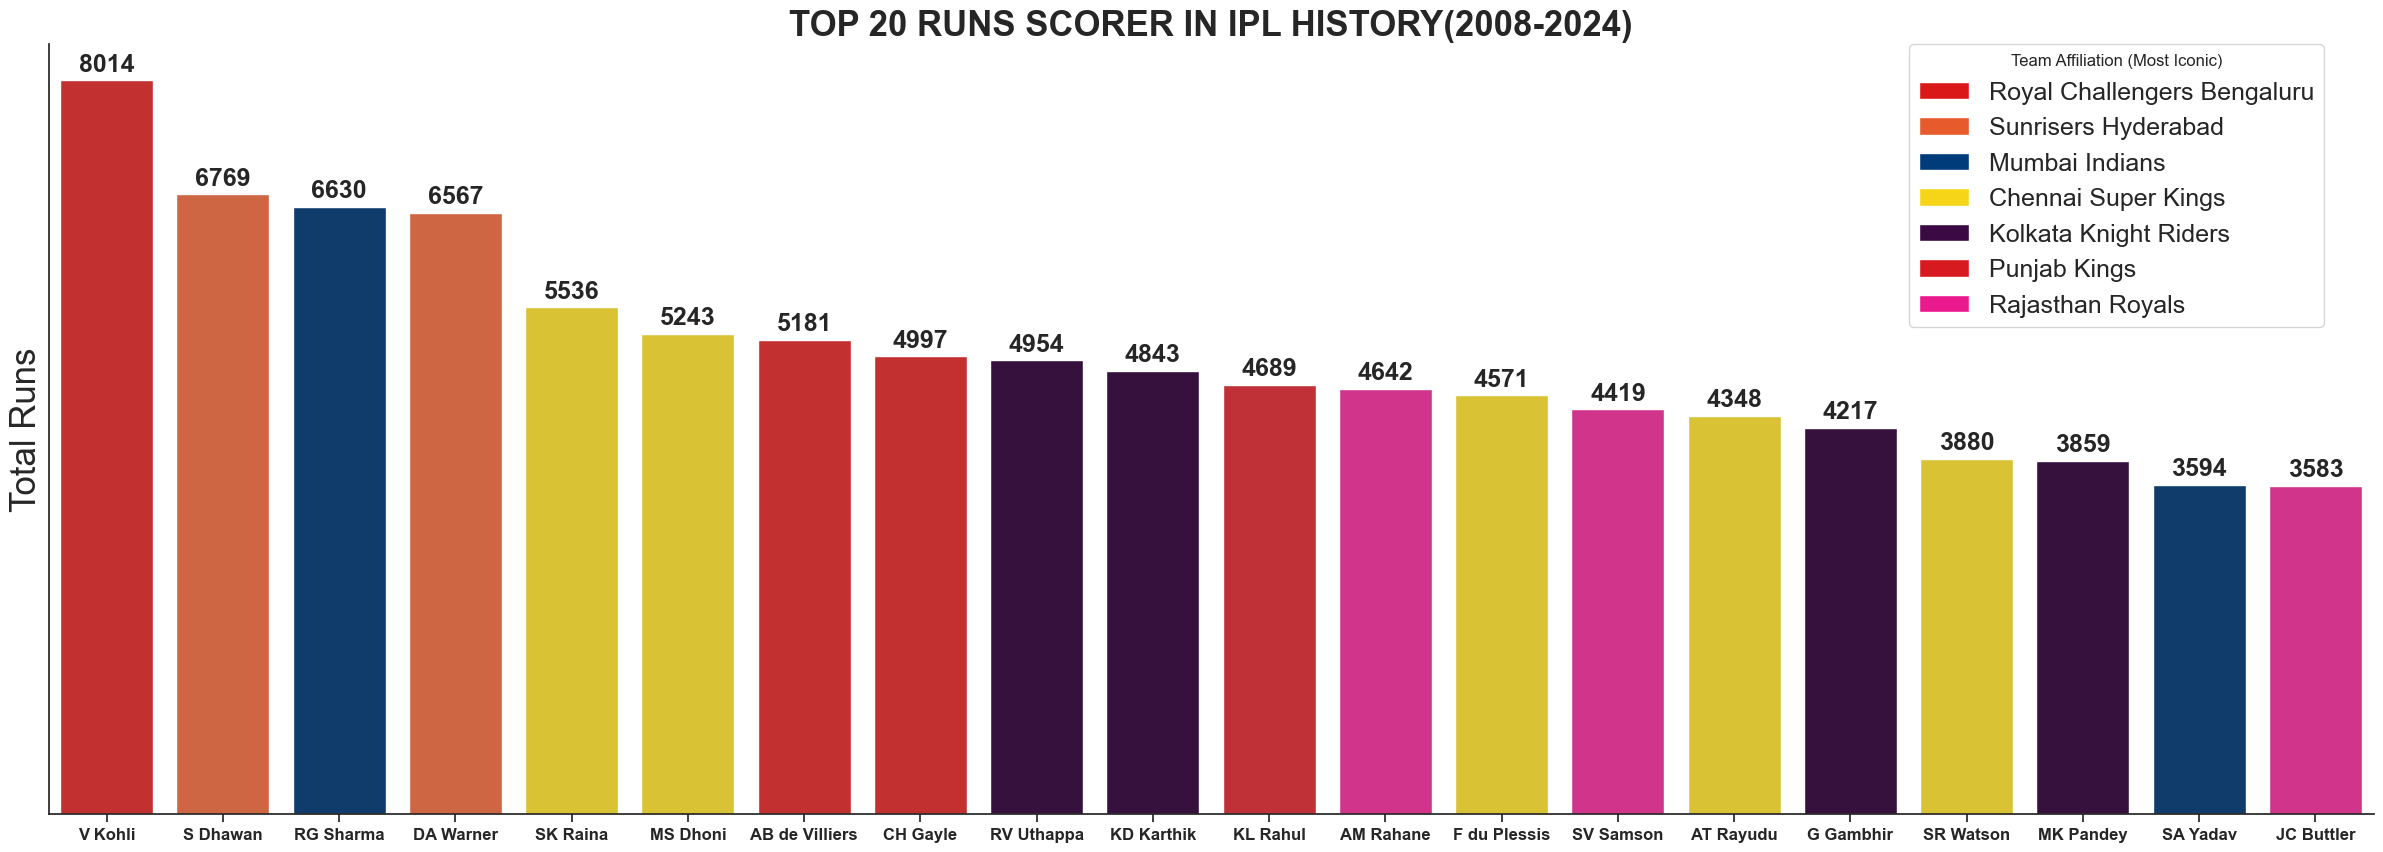

In [334]:
#plotting
plt.figure(figsize=(30,10))
plt.title(
    'TOP 20 RUNS SCORER IN IPL HISTORY(2008-2024)',
    fontweight='bold',
    fontsize=25
    )
ax=sns.barplot(
    data=df_top_run_scorers,
    x='batter',
    y='Total_Runs',
    palette=[team_colors[t] for t in df_top_run_scorers['Team']]
    )
plt.xlabel('')
plt.ylabel('Total Runs',fontsize=25)
plt.yticks([])
sns.despine()
plt.xticks(fontsize=12,fontweight='bold')

for i,row in enumerate(df_top_run_scorers.itertuples()):
    ax.text(
        i,
        row.Total_Runs+100,
        f"{int(row.Total_Runs)}",
        ha='center',
        fontweight='bold',
        fontsize=18
            )

ax.legend(
    handles=legend_team_patch,
    title='Team Affiliation (Most Iconic)', 
    bbox_to_anchor=(0.8, 1), # Position it outside the plot area (right side)
    loc='upper left',
    borderaxespad=0.,
    fontsize=18
)

In [335]:
#Counting Total No of Balls Faced by the TOP 20 Runs scorer

df_without_wide=df[df['extras_type']!='wides'] #filtered the wide ball data 
Total_balls_faced=df_without_wide['batter'].value_counts().reset_index(name='Total_balls')

#Combing the Data Of Total Balls and Total Runs

df_top_run_scorers_balls_combined=df_top_run_scorers.merge(Total_balls_faced,on='batter',how='left')
df_top_run_scorers_balls_combined

,batter,Total_Runs,Team,Total_balls
0,V Kohli,8014,Royal Challengers Bengaluru,6069
1,S Dhawan,6769,Sunrisers Hyderabad,5326
2,RG Sharma,6630,Mumbai Indians,5057
3,DA Warner,6567,Sunrisers Hyderabad,4702
4,SK Raina,5536,Chennai Super Kings,4046
5,MS Dhoni,5243,Chennai Super Kings,3812
6,AB de Villiers,5181,Royal Challengers Bengaluru,3411
7,CH Gayle,4997,Royal Challengers Bengaluru,3346
8,RV Uthappa,4954,Kolkata Knight Riders,3801
9,KD Karthik,4843,Kolkata Knight Riders,3580


In [336]:
#Counting No of Dismissals to Count The Average Of Players
df_dismissed = df['player_dismissed'].value_counts().to_frame('Total Dismissal')
df_dismissed.index.name = 'batter'

#Combing the Dismissal Data to Main DF
df_top_run_scorers_balls_combined_dismissal=df_top_run_scorers_balls_combined.merge(df_dismissed,on='batter',how='left')

#Calculating The SR And Average Of Players

df_top_run_scorers_balls_combined_dismissal['Strike_Rate']=((df_top_run_scorers_balls_combined['Total_Runs'])/(df_top_run_scorers_balls_combined['Total_balls'])*100).round(1)
df_top_run_scorers_balls_combined_dismissal['Average']=(df_top_run_scorers_balls_combined_dismissal['Total_Runs']/df_top_run_scorers_balls_combined_dismissal['Total Dismissal']).round(2)
df_top_run_scorers_balls_combined_dismissal

,batter,Total_Runs,Team,Total_balls,Total Dismissal,Strike_Rate,Average
0,V Kohli,8014,Royal Challengers Bengaluru,6069,207,132.0,38.71
1,S Dhawan,6769,Sunrisers Hyderabad,5326,193,127.1,35.07
2,RG Sharma,6630,Mumbai Indians,5057,223,131.1,29.73
3,DA Warner,6567,Sunrisers Hyderabad,4702,164,139.7,40.04
4,SK Raina,5536,Chennai Super Kings,4046,171,136.8,32.37
5,MS Dhoni,5243,Chennai Super Kings,3812,134,137.5,39.13
6,AB de Villiers,5181,Royal Challengers Bengaluru,3411,130,151.9,39.85
7,CH Gayle,4997,Royal Challengers Bengaluru,3346,126,149.3,39.66
8,RV Uthappa,4954,Kolkata Knight Riders,3801,180,130.3,27.52
9,KD Karthik,4843,Kolkata Knight Riders,3580,184,135.3,26.32


In [337]:
#Creating a median average and strike rate to see hown they fare out in this stats

df_top_run_scorers_balls_combined_dismissal['Mean Average']=df_top_run_scorers_balls_combined_dismissal['Average'].mean()
df_top_run_scorers_balls_combined_dismissal['Avg Diff']=df_top_run_scorers_balls_combined_dismissal['Average']-df_top_run_scorers_balls_combined_dismissal['Mean Average']

df_top_run_scorers_balls_combined_dismissal['Mean SR']=df_top_run_scorers_balls_combined_dismissal['Strike_Rate'].mean()
df_top_run_scorers_balls_combined_dismissal['SR Diff']=df_top_run_scorers_balls_combined_dismissal['Strike_Rate']-df_top_run_scorers_balls_combined_dismissal['Mean SR']

df_top_run_scorers_balls_combined_dismissal


,batter,Total_Runs,Team,Total_balls,Total Dismissal,Strike_Rate,Average,Mean Average,Avg Diff,Mean SR,SR Diff
0,V Kohli,8014,Royal Challengers Bengaluru,6069,207,132.0,38.71,33.914,4.796,135.375,-3.375
1,S Dhawan,6769,Sunrisers Hyderabad,5326,193,127.1,35.07,33.914,1.156,135.375,-8.275
2,RG Sharma,6630,Mumbai Indians,5057,223,131.1,29.73,33.914,-4.184,135.375,-4.275
3,DA Warner,6567,Sunrisers Hyderabad,4702,164,139.7,40.04,33.914,6.126,135.375,4.325
4,SK Raina,5536,Chennai Super Kings,4046,171,136.8,32.37,33.914,-1.544,135.375,1.425
5,MS Dhoni,5243,Chennai Super Kings,3812,134,137.5,39.13,33.914,5.216,135.375,2.125
6,AB de Villiers,5181,Royal Challengers Bengaluru,3411,130,151.9,39.85,33.914,5.936,135.375,16.525
7,CH Gayle,4997,Royal Challengers Bengaluru,3346,126,149.3,39.66,33.914,5.746,135.375,13.925
8,RV Uthappa,4954,Kolkata Knight Riders,3801,180,130.3,27.52,33.914,-6.394,135.375,-5.075
9,KD Karthik,4843,Kolkata Knight Riders,3580,184,135.3,26.32,33.914,-7.594,135.375,-0.075


Text(131.1, 30.3, 'RG Sharma')

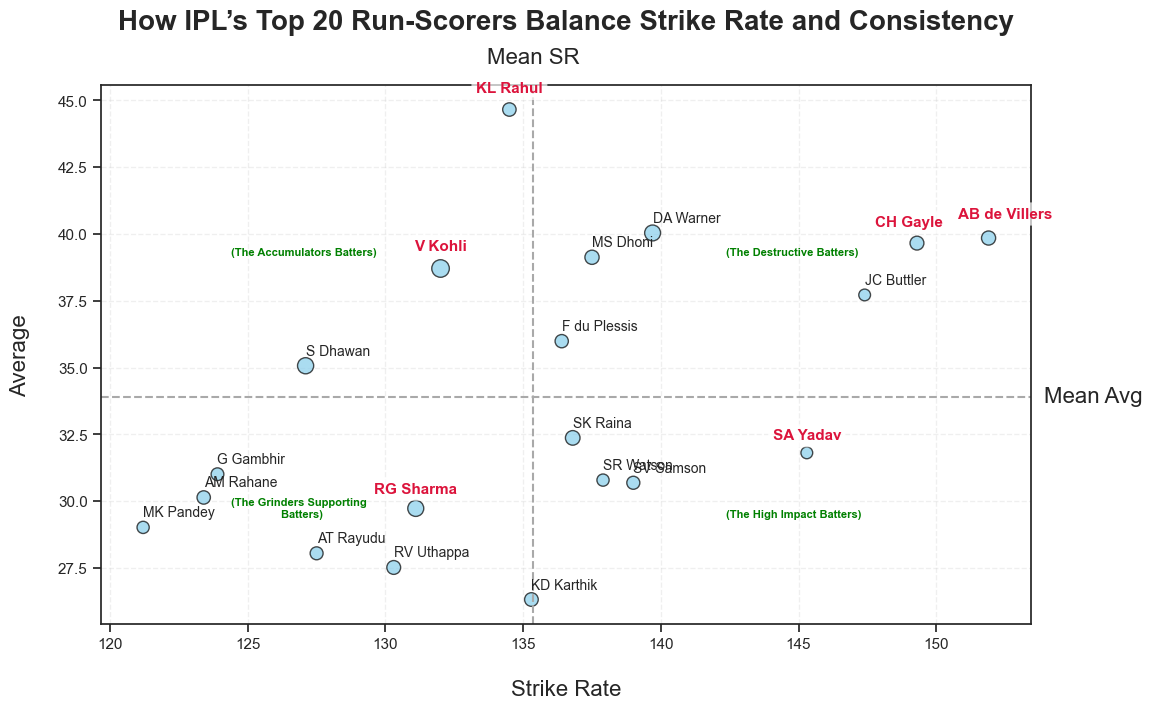

In [338]:
Mean_SR=df_top_run_scorers_balls_combined_dismissal['Mean SR'][1] #To plot The Mean SR line in scatter plot
Mean_AVG=df_top_run_scorers_balls_combined_dismissal['Mean Average'][1] #To plot The Mean Avg line in scatter plot

x_min, x_max = 125, 155
y_min, y_max = 25, 45
plt.figure(figsize=(12,7))
plt.scatter(
    df_top_run_scorers_balls_combined_dismissal['Strike_Rate'],
    df_top_run_scorers_balls_combined_dismissal['Average'],
    df_top_run_scorers_balls_combined_dismissal['Total_Runs']/50,
    edgecolors='black',
    c='skyblue',
    alpha=0.7
)
plt.title('How IPL’s Top 20 Run-Scorers Balance Strike Rate and Consistency', fontsize=20, fontweight='bold', pad=40)
plt.ylabel('Average',fontsize=16,labelpad=20)
plt.xlabel('Strike Rate',fontsize=16,labelpad=20)

plt.grid(True,linestyle='--',alpha=0.3)

plt.axvline(Mean_SR,linestyle='--',color='darkgrey')
plt.axhline(Mean_AVG,linestyle='--',color='darkgrey')

plt.xticks()
plt.yticks()

plt.text(Mean_SR,y_max+1.4,'Mean SR',ha='center',fontsize=16)
plt.text(x_max+0.7,Mean_AVG,'Mean Avg',ha='center',va='center',fontsize=16)

plt.text(Mean_SR-11,Mean_AVG-4.5,'(The Grinders Supporting \n                Batters)',fontsize=8, color="green", fontweight="bold")
plt.text(Mean_SR-11,Mean_AVG-4.5+9.8,'(The Accumulators Batters)',fontsize=8, color="green", fontweight="bold")
plt.text(Mean_SR+7,Mean_AVG-4.5+9.8,'(The Destructive Batters)',fontsize=8, color="green", fontweight="bold")
plt.text(Mean_SR+7,Mean_AVG-4.5,'(The High Impact Batters)',fontsize=8, color="green", fontweight="bold")

skip_player_name=['CH Gayle','KL Rahul','V Kohli','AB de Villiers','SA Yadav','RG Sharma']

for i, name in enumerate(df_top_run_scorers_balls_combined_dismissal['batter']):
    if name in skip_player_name:
        continue  # Skip default label for KL Rahul
    plt.text(df_top_run_scorers_balls_combined_dismissal['Strike_Rate'].iloc[i],
             df_top_run_scorers_balls_combined_dismissal['Average'].iloc[i]+0.4,
             name,
             fontsize=10)


plt.text(134.5, 45.3, 'KL Rahul', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(132,39.4, 'V Kohli', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(152.5	,40.6	, 'AB de Villers', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(149,40.3, 'CH Gayle', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(145.3,32.3,'SA Yadav', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(131.1,30.3,'RG Sharma', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

## Analysis of above plot
This scatter plot analyzes how IPL’s top 20 run-scorers balance strike rate and batting average, highlighting the trade-off between consistency and explosiveness. The vertical and horizontal dashed lines represent the mean strike rate and mean average, dividing the chart into four performance quadrants.

* In the top-right quadrant, players like AB de Villiers, Chris Gayle stand out as high-impact destructive batters, combining strong consistency with aggressive scoring.

* The top-left quadrant includes players such as Virat Kohli and KL Rahul, who excel in consistency and anchor the innings with high averages but relatively moderate strike rates — the accumulators.

* In the bottom-right quadrant, player like SA Yadav represent impact batters who maintain fast scoring rates with a respectable Average.

* The bottom-left quadrant captures supporting batter such as Rohit Sharma who play stabilizing roles but with moderate output in both metrics.

Overall, the visualization emphasizes how different batting profiles contribute uniquely to team success — from anchor roles that build the innings to explosive hitters who accelerate the scoring rate.



##  Analysis: Best Finisher in IPL (2008-2024)

In T20 cricket, the role of a finisher is crucial — these players handle immense pressure, often batting in the final overs where every ball counts. The following analysis focuses on identifying the best finisher in the IPL between 16 and 20 Overs, based on a combination of strike rate, batting average, and consistency under high-pressure situations.
We explore how top run-scorers balance impact (strike rate) and reliability (average) to deliver match-winning performances for their teams.

In [339]:
# ANALYSIS FOR BEST FINISHER IN IPL(16-20)

death_overs=[16,17,18,19]
df_death_over=df[df['over'].isin(death_overs)] #data for 16-20 filtered

#Getting Top 10 Runs Scorers in the 16-20 Overs

df_runs_death_over=df_death_over.groupby('batter')['batsman_runs'].sum().reset_index(name='Total_Runs')
df_runs_death_over=df_runs_death_over.sort_values(by='Total_Runs',ascending=False).head(10)
df_runs_death_over

,batter,Total_Runs
328,MS Dhoni,2786
242,KA Pollard,1708
247,KD Karthik,1565
24,AB de Villiers,1421
415,RA Jadeja,1420
421,RG Sharma,1176
182,HH Pandya,1126
550,V Kohli,1099
31,AD Russell,1065
124,DA Miller,988


In [340]:
#Total balls faced by batsman in 16-20(excluding wides)

df_balls_death_over_without_wides=df_death_over[df_death_over['extras_type']!='wides'] 
df_balls_death_over=df_balls_death_over_without_wides['batter'].value_counts().reset_index(name='Total Balls')
df_balls_death_over

,batter,Total Balls
0,MS Dhoni,1474
1,KA Pollard,941
2,RA Jadeja,889
3,KD Karthik,837
4,HH Pandya,612
...,...,...
578,Yash Dayal,1
579,C Nanda,1
580,A Mukund,1
581,Kumar Kushagra,1


In [341]:
#Combing the Balls and Runs Dataframe
df_death_over_data=df_runs_death_over.merge(df_balls_death_over,on='batter',how='left')

#Calculating The Strike Rate
df_death_over_data['Strike Rate']=((df_death_over_data['Total_Runs'])/(df_death_over_data['Total Balls'])*100).round(2)
df_death_over_data

,batter,Total_Runs,Total Balls,Strike Rate
0,MS Dhoni,2786,1474,189.01
1,KA Pollard,1708,941,181.51
2,KD Karthik,1565,837,186.98
3,AB de Villiers,1421,611,232.57
4,RA Jadeja,1420,889,159.73
5,RG Sharma,1176,598,196.66
6,HH Pandya,1126,612,183.99
7,V Kohli,1099,547,200.91
8,AD Russell,1065,523,203.63
9,DA Miller,988,556,177.70


In [342]:
#Getting data for dot balls faced
df_dot_ball=df_balls_death_over_without_wides[df_balls_death_over_without_wides['batsman_runs']==0]
df_dot_ball_data=df_dot_ball['batter'].value_counts().to_frame()

In [343]:
#Merging dot balls
df_death_over_data_dot_balls=df_death_over_data.merge(df_dot_ball_data,on='batter',how='left')

#Creating Count for Dot Ball Percent
df_death_over_data_dot_balls['Dot Ball %']=((df_death_over_data_dot_balls['count']/df_death_over_data_dot_balls['Total Balls'])*100).round(0)
df_death_over_data_dot_balls

,batter,Total_Runs,Total Balls,Strike Rate,count,Dot Ball %
0,MS Dhoni,2786,1474,189.01,383,26.0
1,KA Pollard,1708,941,181.51,291,31.0
2,KD Karthik,1565,837,186.98,230,27.0
3,AB de Villiers,1421,611,232.57,133,22.0
4,RA Jadeja,1420,889,159.73,221,25.0
5,RG Sharma,1176,598,196.66,151,25.0
6,HH Pandya,1126,612,183.99,169,28.0
7,V Kohli,1099,547,200.91,117,21.0
8,AD Russell,1065,523,203.63,180,34.0
9,DA Miller,988,556,177.70,144,26.0


In [344]:
df_death_over_data_dot_balls=df_death_over_data_dot_balls.drop(columns='count')

In [345]:
df_death_over_data_dot_balls

,batter,Total_Runs,Total Balls,Strike Rate,Dot Ball %
0,MS Dhoni,2786,1474,189.01,26.0
1,KA Pollard,1708,941,181.51,31.0
2,KD Karthik,1565,837,186.98,27.0
3,AB de Villiers,1421,611,232.57,22.0
4,RA Jadeja,1420,889,159.73,25.0
5,RG Sharma,1176,598,196.66,25.0
6,HH Pandya,1126,612,183.99,28.0
7,V Kohli,1099,547,200.91,21.0
8,AD Russell,1065,523,203.63,34.0
9,DA Miller,988,556,177.70,26.0


In [346]:
#Counting No of 4s AND 6s in (16-20)Overs
df_boundary=df_balls_death_over_without_wides[(df_balls_death_over_without_wides['batsman_runs']==4) | (df_balls_death_over_without_wides['batsman_runs']==6)]
df_bd=df_boundary['batter'].value_counts().to_frame()

In [347]:
df_bd

,count
batter,
MS Dhoni,386
KA Pollard,237
KD Karthik,233
AB de Villiers,218
RA Jadeja,173
...,...
Arshad Khan (2),1
L Wood,1
G Coetzee,1


In [348]:
#combing BD count to Main Df
df_death_over_data_dot_balls_bd=df_death_over_data_dot_balls.merge(df_bd,on='batter',how='left')
df_death_over_data_dot_balls_bd['Boundary %']=((df_death_over_data_dot_balls_bd['count'])/(df_death_over_data_dot_balls_bd['Total Balls'])*100).round(0)

In [349]:
df_death_over_data_dot_balls_bd.drop(columns='count')
df_death_over_data_dot_balls_bd

,batter,Total_Runs,Total Balls,Strike Rate,Dot Ball %,count,Boundary %
0,MS Dhoni,2786,1474,189.01,26.0,386,26.0
1,KA Pollard,1708,941,181.51,31.0,237,25.0
2,KD Karthik,1565,837,186.98,27.0,233,28.0
3,AB de Villiers,1421,611,232.57,22.0,218,36.0
4,RA Jadeja,1420,889,159.73,25.0,173,19.0
5,RG Sharma,1176,598,196.66,25.0,173,29.0
6,HH Pandya,1126,612,183.99,28.0,158,26.0
7,V Kohli,1099,547,200.91,21.0,149,27.0
8,AD Russell,1065,523,203.63,34.0,171,33.0
9,DA Miller,988,556,177.70,26.0,130,23.0


Text(34.0, 206, 'AD Russell')

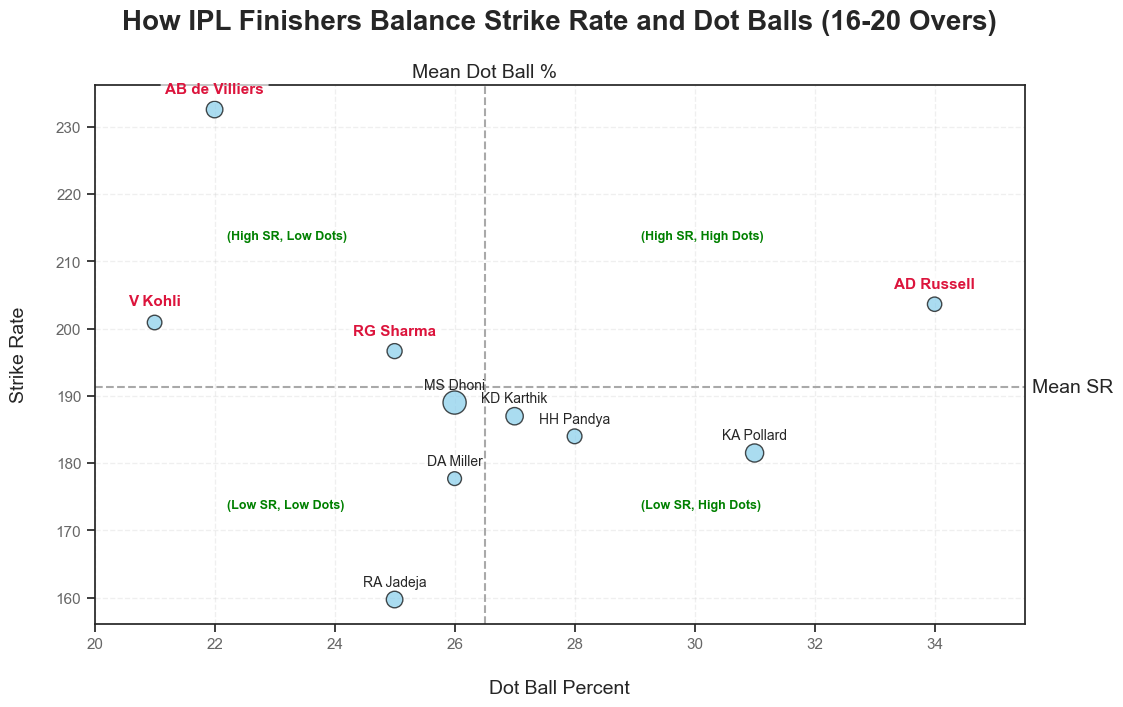

In [350]:
#Plotting Strike Rate vs Dot Ball

Mean_SR_death_over=df_death_over_data_dot_balls_bd['Strike Rate'].mean().round(2)
Mean_DOT_BALL=df_death_over_data_dot_balls_bd['Dot Ball %'].mean().round(2)

plt.figure(figsize=(12,7))
plt.scatter(
    df_death_over_data_dot_balls_bd['Dot Ball %'],
    df_death_over_data_dot_balls_bd['Strike Rate'],
    df_death_over_data_dot_balls_bd['Total_Runs']/10,
    edgecolors='black',
    c='skyblue',
    alpha=0.7
)
plt.title("How IPL Finishers Balance Strike Rate and Dot Balls (16-20 Overs)", fontsize=20, fontweight='bold', pad=40)
plt.ylabel('Strike Rate',fontsize=14,labelpad=20)
plt.xlabel('Dot Ball Percent',fontsize=14,labelpad=20)

plt.grid(True,linestyle='--',alpha=0.3)

plt.axvline(Mean_DOT_BALL,linestyle='--',color='darkgrey')
plt.text(Mean_DOT_BALL,df_death_over_data_dot_balls_bd['Strike Rate'].max()+5.5,'Mean Dot Ball %',ha='center',fontsize=14,va='center')

plt.axhline(Mean_SR_death_over,linestyle='--',color='darkgrey')
plt.text(df_death_over_data_dot_balls_bd['Dot Ball %'].max()+2.3,Mean_SR_death_over,'Mean SR',ha='center',fontsize=14,va='center')

plt.text(Mean_DOT_BALL-4.3, Mean_SR_death_over+22, "(High SR, Low Dots)", fontsize=9, color="green", fontweight="bold")
plt.text(Mean_DOT_BALL-4.3, Mean_SR_death_over-18, "(Low SR, Low Dots)", fontsize=9, color="green", fontweight="bold")
plt.text(Mean_DOT_BALL+2.6, Mean_SR_death_over+22, "(High SR, High Dots)", fontsize=9, color="green", fontweight="bold")
plt.text(Mean_DOT_BALL+2.6, Mean_SR_death_over-18, "(Low SR, High Dots)", fontsize=9, color="green", fontweight="bold")

plt.xlim(20,35.5)

plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)

player_skip=['V Kohli','AB de Villiers','AD Russell','RG Sharma']
for i,name in enumerate(df_death_over_data_dot_balls['batter']):
    if name in player_skip:
        continue
    else:
        plt.text(df_death_over_data_dot_balls_bd['Dot Ball %'].iloc[i],
             df_death_over_data_dot_balls_bd['Strike Rate'].iloc[i]+2,
             name,
             fontsize=10,
             ha='center'
             )

plt.text(21.0,203.4,'V Kohli', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(22.0,235,'AB de Villiers', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(25.0,199,'RG Sharma', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(34.0,206,'AD Russell', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))



##  Best Finisher in IPL (16–20 Overs)

In T20 cricket, the final overs (16–20) are where true finishers shine — players who can handle immense pressure, minimize dot balls, and maintain explosive strike rates.  
This analysis examines how top IPL batters balance **Strike Rate** and **Dot Ball Percentage** in this crucial phase, offering insight into their effectiveness as finishers.

The scatter plot below divides players into four quadrants based on their **mean strike rate (SR)** and **mean dot ball %**:  
- **Top-left (High SR, Low Dots):** Ideal finishers who score quickly while keeping the scoreboard moving and Does not Play Too much Dots.  
- **Top-right (High SR, High Dots):** Power-hitters who score fast but take more dot balls and are more replying on taking risks .  
- **Bottom-left (Low SR, Low Dots):** Players who rotate strike and gets a Odd Boundary here and there.
Players Like MS dhoni And Miller who Rotates SR and Hit Boundaries as well  
- **Bottom-right (Low SR, High Dots):** Least effective in death overs in respect to other Top Players but that doesnt mean they dont score well players like KD kartik and HH Pandya have Great SR but With More Dot Balls than other .

### 🔴 Highlighted Players:
- **AB de Villiers:** The standout performer, combining the *highest strike rate (~233)* with *one of the lowest dot ball percentages*. His ability to clear boundaries effortlessly while keeping the scoreboard ticking cements his place as the most complete finisher.  
- **AD Russell:** A brute-force hitter with a high strike rate but also a relatively high dot ball percentage. While devastating when he connects, his approach involves higher risk and occasional quiet overs.  
- **V Kohli:** Maintains a balanced approach — High strike rate with low dot balls — showing control and consistency rather than sheer explosiveness.  
- **RG Sharma:** Similar to Kohli, he performs steadily with High strike rate and controlled dots, relying on timing and placement rather than brute power.

Together, these players represent distinct finishing archetypes — from de Villiers’ intelligent aggression to Russell’s raw power and Kohli’s calculated tempo.  
This visualization highlights how **AB de Villiers** consistently outperformed his peers, emerging as the **most efficient and dependable finisher** in IPL’s death overs


Text(25.0, 29.5, 'RG Sharma')

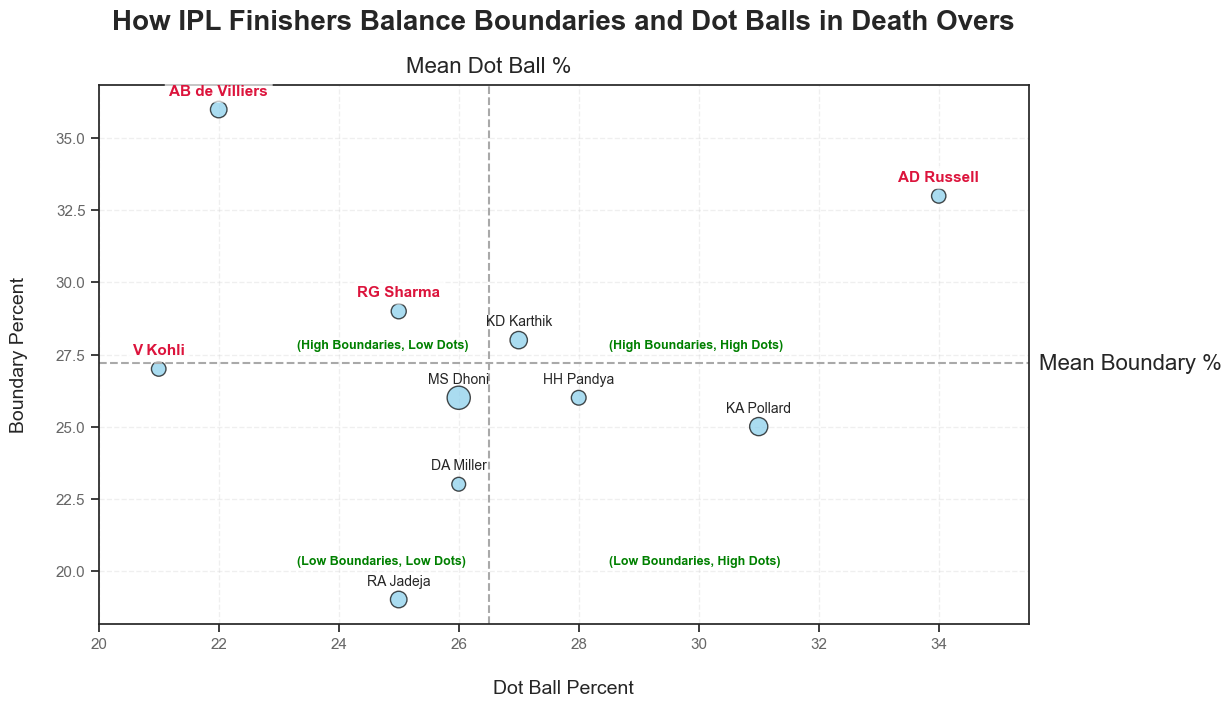

In [351]:
#Plotting  BD percent vs Dot Percent 

Mean_Boundary=df_death_over_data_dot_balls_bd['Boundary %'].mean().round(2)
plt.figure(figsize=(12,7))
plt.scatter(
    df_death_over_data_dot_balls_bd['Dot Ball %'],
    df_death_over_data_dot_balls_bd['Boundary %'],
    df_death_over_data_dot_balls_bd['Total_Runs']/10,
    edgecolors='black',
    c='skyblue',
    alpha=0.7
)
plt.title("How IPL Finishers Balance Boundaries and Dot Balls in Death Overs", fontsize=20, fontweight='bold', pad=40)
plt.ylabel('Boundary Percent',fontsize=14,labelpad=20)
plt.xlabel('Dot Ball Percent',fontsize=14,labelpad=20)

plt.grid(True,linestyle='--',alpha=0.3)

plt.axhline(Mean_Boundary,linestyle='--',color='darkgrey')
plt.text(df_death_over_data_dot_balls_bd['Dot Ball %'].max()+3.2,Mean_Boundary,'Mean Boundary %',ha='center',fontsize=16,va='center')

plt.axvline(Mean_DOT_BALL,linestyle='--',color='darkgrey')
plt.text(Mean_DOT_BALL,df_death_over_data_dot_balls_bd['Boundary %'].max()+1.5,'Mean Dot Ball %',ha='center',fontsize=16,va='center')

plt.xticks(alpha=0.7)
plt.yticks(alpha=0.7)
plt.xlim(20,35.5)

# Quadrant labels
plt.text(Mean_DOT_BALL-3.2, Mean_Boundary+0.5, "(High Boundaries, Low Dots)", fontsize=9, color="green", fontweight="bold")
plt.text(Mean_DOT_BALL-3.2, Mean_Boundary-7, "(Low Boundaries, Low Dots)", fontsize=9, color="green", fontweight="bold")
plt.text(Mean_DOT_BALL+2, Mean_Boundary+0.5, "(High Boundaries, High Dots)", fontsize=9, color="green", fontweight="bold")
plt.text(Mean_DOT_BALL+2, Mean_Boundary-7, "(Low Boundaries, High Dots)", fontsize=9, color="green", fontweight="bold")

skip_p_name=['AD Russell','V Kohli','RG Sharma','AB de Villiers']
for i,name in enumerate(df_death_over_data_dot_balls['batter']):
    if name in skip_p_name:
        continue
    else:
        plt.text(df_death_over_data_dot_balls_bd['Dot Ball %'].iloc[i],
             df_death_over_data_dot_balls_bd['Boundary %'].iloc[i]+0.5,
             name,
             ha='center',
             fontsize=10,
             )
    
plt.text(34.0,33.5,'AD Russell', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(21.0,27.5,'V Kohli', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(22.0,36.5,'AB de Villiers', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(25.0,29.5,'RG Sharma', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))



---
## Analysis: How IPL Finishers Balance Boundaries and Dot Balls in Death Overs

This visualization explores how some of the IPL’s best finishers balance their **boundary-hitting ability (Boundary %)** against their **dot-ball percentage** during the **death overs (16–20)**.  
The ideal finisher aims to **maximize boundaries while minimizing dot balls**, showcasing both aggression and efficiency under pressure.
#### 🔹 **Key Insights**

- **AB de Villiers**  – The *perfect finisher*, combining the **highest boundary percentage (~36%)** with one of the **lowest dot ball rates (~22%)**. His ability to find gaps and clear boundaries consistently makes him the most complete death-overs batter.  
- **AD Russell**  – Displays **very high boundary frequency (~33%)** but also has a **high dot ball rate (~34%)**. Represents a power-hitter who swings big — high risk, high reward.  
- **RG Sharma**  – Maintains a **strong boundary rate (~29%)** while keeping his **dot ball percentage below average (~25%)**, indicating a composed and balanced finisher.  
- **V Kohli**  – Focuses on **minimizing dot balls (~21%)** rather than boundary-hitting, excelling at strike rotation and ensuring steady pressure on bowlers.



####  **Quadrant Interpretation**

- **Top-Left (High Boundaries, Low Dots)** → *Ideal Zone*: **AB de Villiers**, **RG Sharma** — the most balanced and efficient finishers.  
- **Top-Right (High Boundaries, High Dots)** → *Explosive Zone*: **AD Russell** — brutal power but inconsistent rhythm.  
- **Bottom-Left (Low Boundaries, Low Dots)** → *Smart Rotators*: **V Kohli** — relies on strike rotation rather than boundary bursts.  
- **Bottom-Right (Low Boundaries, High Dots)** → *Inefficient Zone*: Least effective finishing profile.


####  **Summary**

In the death overs:
- **AB de Villiers** stands out as the most complete finisher — aggressive yet efficient.  
- **AD Russell** dominates through sheer power, though with occasional inconsistency.  
- **Rohit Sharma** offers a reliable balance between boundaries and control.  
- **Virat Kohli** thrives through calculated consistency and strike rotation.


---











## Middle-Order Batters in the IPL (Overs 7–15): The Stability Phase

The middle overs (7–15) form the **bridge between the powerplay and the death overs**, where the game’s momentum is built through **controlled aggression and strike rotation**.  
This phase tests a batter’s ability to **anchor the innings**, **rotate the strike**, and **capitalize on loose deliveries** without taking excessive risks.  

In this analysis, we examine how key IPL batters — such as **Virat Kohli**, **Suryakumar Yadav**, **Shreyas Iyer**, **AB de Villiers**, and **Rohit Sharma** — perform during this crucial phase.  
By comparing **Strike Rate**  we identify the most efficient middle-order players who maintain scoring flow while keeping their wicket intact.


---


In [352]:
#MIDDLE OVER DATA (For Analyzing Best Player in the Middle Overs)

middle_over=[6,7,8,9,10,11,12,13,14,15]
df_middle_over=df[df['over'].isin(middle_over)]
df_middle_over_withoutwides=df_middle_over[df_middle_over['extras_type']!='wides']

#Counting Balls Faced By Each Player in The Middle Order

df_middle_over_balls_count = df_middle_over_withoutwides['batter'].value_counts().rename_axis('batter').reset_index(name='Total Balls')
df_middle_over_balls_count

,batter,Total Balls
0,V Kohli,3242
1,RG Sharma,2711
2,SK Raina,2486
3,KD Karthik,2338
4,MS Dhoni,2266
...,...,...
542,R Bishnoi,1
543,DNT Zoysa,1
544,AT Carey,1
545,Harshit Rana,1


In [353]:
#TOP 20 Runs Scorers in middle over

df_runs_middle_order=df_middle_over_withoutwides.groupby('batter')['batsman_runs'].sum()
df_runs_middle_order=df_runs_middle_order.reset_index(name="Total Runs")
df_runs_middle_order=df_runs_middle_order.sort_values(by='Total Runs',ascending=False).head(20)
df_runs_middle_order

,batter,Total Runs
516,V Kohli,4106
391,RG Sharma,3317
444,SK Raina,3312
25,AB de Villiers,3019
229,KD Karthik,2881
419,S Dhawan,2855
122,DA Warner,2834
54,AT Rayudu,2694
469,SV Samson,2652
409,RV Uthappa,2502


In [354]:
#Merging Balls and Runs

df_runs_middle_order_balls=df_runs_middle_order.merge(df_middle_over_balls_count,on='batter',how='left')

#Calculating SR
df_runs_middle_order_balls['Strike Rate']=((df_runs_middle_order_balls['Total Runs']/df_runs_middle_order_balls['Total Balls'])*100).round(2)
df_runs_middle_order_balls.rename(columns={'Total Runs': 'Total_Runs'}, inplace=True)
df_runs_middle_order_balls.rename(columns={'Strike Rate': 'Strike_Rate'}, inplace=True)
df_runs_middle_order_balls

,batter,Total_Runs,Total Balls,Strike_Rate
0,V Kohli,4106,3242,126.65
1,RG Sharma,3317,2711,122.35
2,SK Raina,3312,2486,133.23
3,AB de Villiers,3019,2186,138.11
4,KD Karthik,2881,2338,123.22
5,S Dhawan,2855,2241,127.40
6,DA Warner,2834,2066,137.17
7,AT Rayudu,2694,2163,124.55
8,SV Samson,2652,1896,139.87
9,RV Uthappa,2502,1926,129.91


C:\Users\vansh\AppData\Local\Temp\ipykernel_12652\3871702748.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_runs_middle_order_balls,x='batter',y='Total_Runs',palette=colors,hue='Total_Runs')


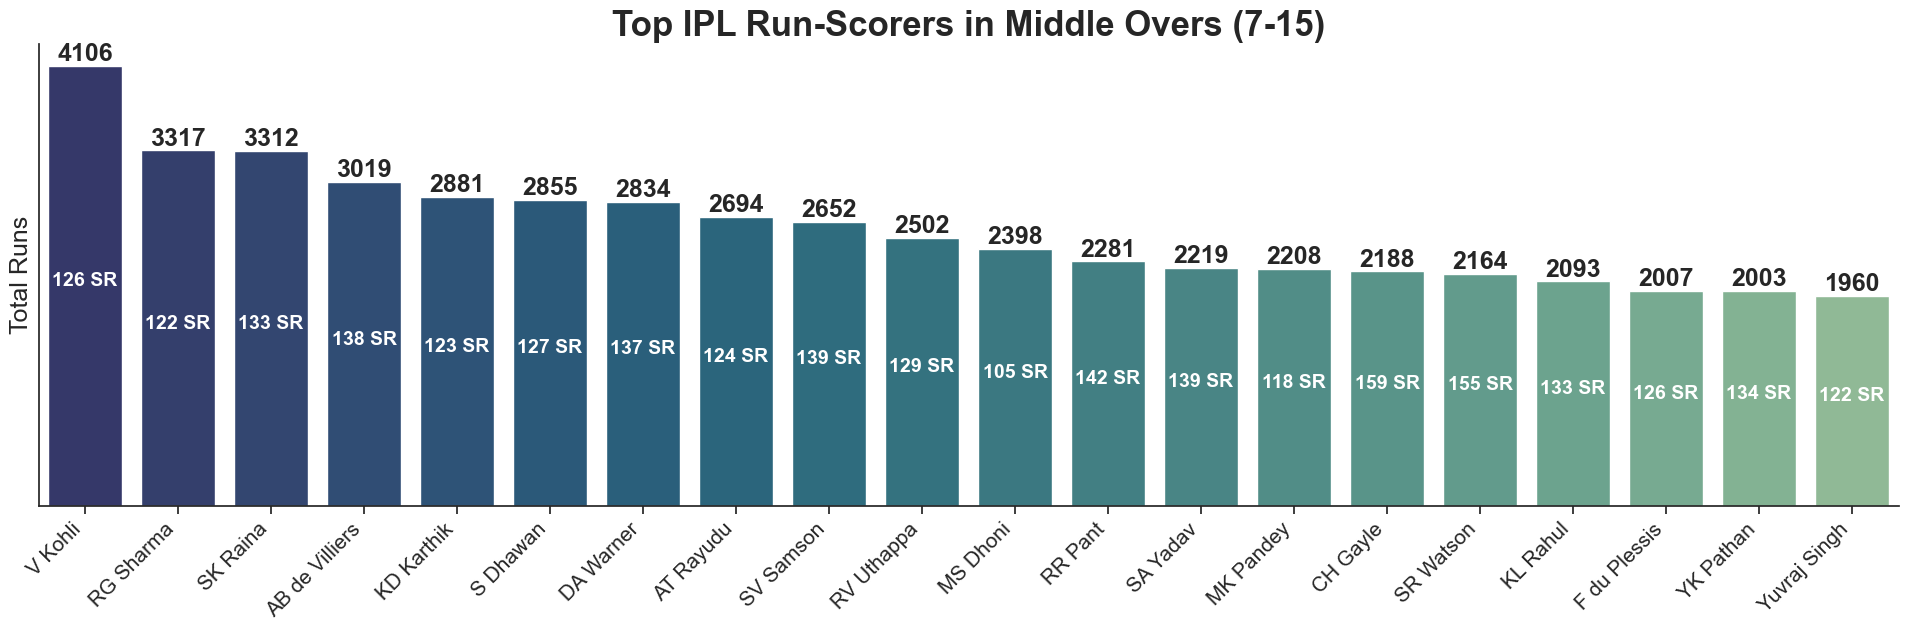

In [355]:
#Plotting Bar Plot for Most Runs in Middle Overs

palette = sns.color_palette("crest", as_cmap=True)
colors = palette(np.linspace(0.1, 1, len(df_runs_middle_order_balls)))
plt.figure(figsize=(24,6))
sns.set_theme(style='ticks')
sns.barplot(data=df_runs_middle_order_balls,x='batter',y='Total_Runs',palette=colors,hue='Total_Runs')
sns.despine()
plt.xlabel('')
plt.ylabel('Total Runs',fontsize=18)
plt.title('Top IPL Run-Scorers in Middle Overs (7-15)',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,rotation=45, ha='right')
plt.yticks([])
plt.legend().remove()

for i, row in enumerate(df_runs_middle_order_balls.itertuples()):
    plt.text(i,row.Total_Runs+50,f"{int(row.Total_Runs)}",ha='center',fontweight='bold',fontsize=18)
    plt.text(i, row.Total_Runs * 0.5, f"{int(row.Strike_Rate)} SR", 
             ha='center', color='white', fontweight='bold', fontsize=14)


---
##  **Top IPL Run-Scorers in Middle Overs (7–15)**

The middle overs (7–15) define a team’s stability and set the tone for the final assault in the death overs.  
This phase demands a balance between **strike rotation and calculated boundary-hitting**, where batters must handle spin-heavy attacks and maintain momentum without losing wickets.

###  **Key Insights**
- **Virat Kohli** dominates this phase with a massive **4106 runs** at a **strike rate of 126**, highlighting his unmatched consistency and ability to anchor the innings during the middle phase.  
- **Rohit Sharma (3317 runs)** and **Suresh Raina (3312 runs)** follow closely, showcasing their long-standing impact as dependable top-to-middle-order contributors.  
- **AB de Villiers (3019 runs, SR 138)** stands out as one of the most explosive performers in this segment, combining aggression with control — a hallmark of his middle-order brilliance.  
- **Sanju Samson (2652 runs, SR 139)** and **Rishabh Pant (2281 runs, SR 142)** represent the modern generation’s attacking approach, maintaining high strike rates while scoring consistently in this tricky phase.  
- **Chris Gayle (2188 runs, SR 159)** and **Shane Watson (2164 runs, SR 155)** bring raw power to the middle overs, though their totals are lower due to playing fewer innings compared to Kohli and Raina.  
- **MS Dhoni (2398 runs, SR 105)**, though lower in strike rate, often plays the role of consolidator, steering his team safely through the middle before accelerating later.



###  **Conclusion**
Middle-over success in the IPL is not just about big-hitting but about **sustaining pressure**, **building partnerships**, and **setting up the death overs**.  
Players like Kohli, Raina, and de Villiers exemplify the perfect balance between stability and intent, making them the gold standard of middle-order performance in IPL history.

---

In [356]:
#Calculating No of Dismissals To Calculate Average

df_middle_over_out=df_middle_over_withoutwides['player_dismissed'].value_counts().reset_index(name='Dismissal')
df_middle_over_out=df_middle_over_out.rename(columns={'player_dismissed':'batter'})

#Merging Dismissal With Orignal Middle Over Data Frame

df_runs_middle_order_balls_avg=df_runs_middle_order_balls.merge(df_middle_over_out,on='batter',how='left')
df_runs_middle_order_balls_avg

,batter,Total_Runs,Total Balls,Strike_Rate,Dismissal
0,V Kohli,4106,3242,126.65,100
1,RG Sharma,3317,2711,122.35,101
2,SK Raina,3312,2486,133.23,101
3,AB de Villiers,3019,2186,138.11,71
4,KD Karthik,2881,2338,123.22,101
5,S Dhawan,2855,2241,127.40,85
6,DA Warner,2834,2066,137.17,70
7,AT Rayudu,2694,2163,124.55,84
8,SV Samson,2652,1896,139.87,79
9,RV Uthappa,2502,1926,129.91,95


In [357]:
#Calculating Average 

df_runs_middle_order_balls_avg['Average']=(df_runs_middle_order_balls_avg['Total_Runs']/df_runs_middle_order_balls_avg['Dismissal']).round(2)
df_runs_middle_order_balls_avg

,batter,Total_Runs,Total Balls,Strike_Rate,Dismissal,Average
0,V Kohli,4106,3242,126.65,100,41.06
1,RG Sharma,3317,2711,122.35,101,32.84
2,SK Raina,3312,2486,133.23,101,32.79
3,AB de Villiers,3019,2186,138.11,71,42.52
4,KD Karthik,2881,2338,123.22,101,28.52
5,S Dhawan,2855,2241,127.40,85,33.59
6,DA Warner,2834,2066,137.17,70,40.49
7,AT Rayudu,2694,2163,124.55,84,32.07
8,SV Samson,2652,1896,139.87,79,33.57
9,RV Uthappa,2502,1926,129.91,95,26.34


Text(126.65, 41.76, 'V Kohli')

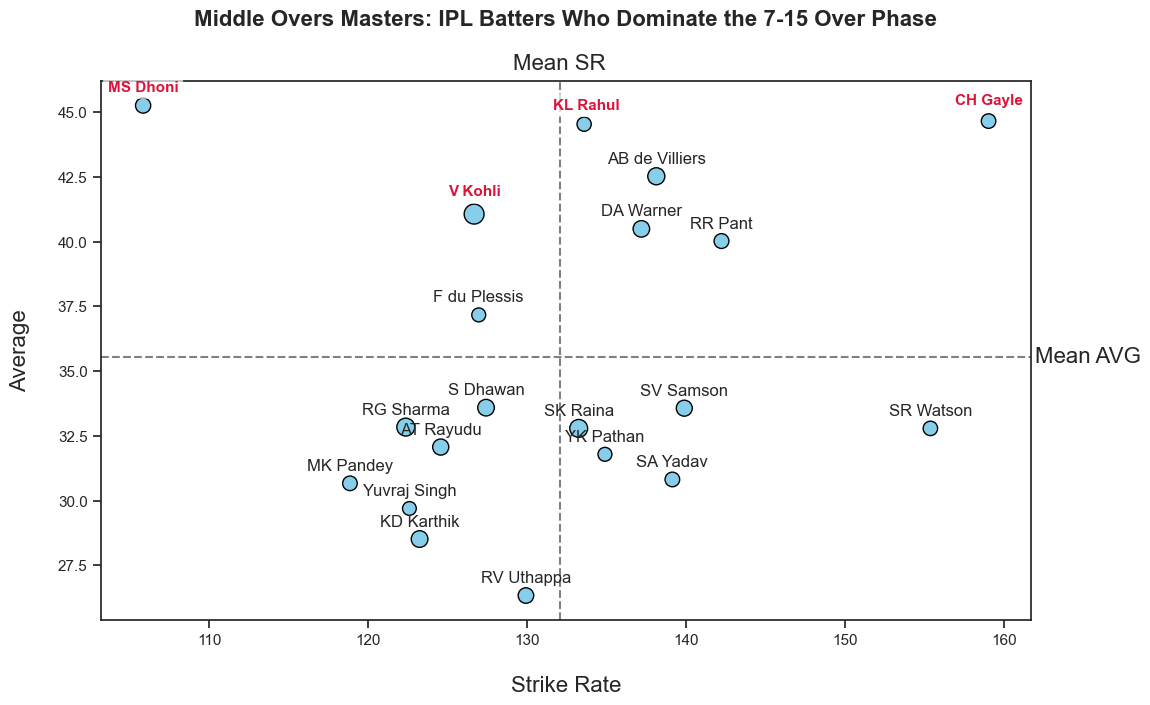

In [358]:
#Plotting SR Vs AVG for TOP 20 Runs Getter in Middle Overs

Mean_AVG_Middle=df_runs_middle_order_balls_avg['Average'].mean()
Mean_SR_Middle=df_runs_middle_order_balls_avg['Strike_Rate'].mean()
plt.figure(figsize=(12,7))
plt.scatter(
    df_runs_middle_order_balls_avg['Strike_Rate'],
    df_runs_middle_order_balls_avg['Average'],
    df_runs_middle_order_balls_avg['Total_Runs']/20,
    c='skyblue',
    edgecolor='black',
    )

plt.axhline(Mean_AVG_Middle,linestyle='--',color='gray')
plt.axvline(Mean_SR_Middle,linestyle='--',color='gray')
plt.text(Mean_SR_Middle,df_runs_middle_order_balls_avg['Average'].max()+1.4,'Mean SR',ha='center',fontsize=16)
plt.text(df_runs_middle_order_balls_avg['Strike_Rate'].max()+2.9,Mean_AVG_Middle,'Mean AVG',va='center',fontsize=16)
plt.title('Middle Overs Masters: IPL Batters Who Dominate the 7-15 Over Phase',pad=40,fontsize=16,fontweight='bold')
plt.ylabel('Average',fontsize=16,labelpad=20)
plt.xlabel('Strike Rate',fontsize=16,labelpad=20)

pl_skip=['KL Rahul','CH Gayle','MS Dhoni','V Kohli']

for i,name in enumerate(df_runs_middle_order_balls_avg['batter']):
    if name in pl_skip:
        continue
    else: 
        plt.text(df_runs_middle_order_balls_avg['Strike_Rate'].iloc[i],
                 df_runs_middle_order_balls_avg['Average'].iloc[i]+0.5
                 ,name
                 ,ha='center')

plt.text(133.7,45.1,'KL Rahul', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(159.01,45.3,'CH Gayle', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(105.83,45.8,'MS Dhoni', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

plt.text(126.65,41.76,'V Kohli', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))




##  Middle Overs Masters: IPL Batters Who Dominate the 7–15 Over Phase

This scatter plot highlights the performance of top IPL batters during the **middle overs (7–15)**, comparing their **mean strike rate (SR)** and **mean average (AVG)**.  
The vertical and horizontal dashed lines represent the **overall mean SR** and **mean AVG**, dividing the chart into four performance quadrants.

###  Quadrant Breakdown

  **Top-Right (High SR, High AVG) — The Elite Dominators**
- **KL Rahul**, **AB de Villiers**, **David Warner**, and **Rishabh Pant** occupy this premium zone.  
  They combine **high consistency (AVG)** with **aggressive acceleration (SR)** an ideal middle-overs profile.  
- **Chris Gayle**, stands out with **the highest strike rate (~159)** and an excellent average  a rare combination of power and efficiency.

**Top-Left (High AVG, Moderate SR) — The Anchors**
- **Virat Kohli**, **MS Dhoni**, and **Faf du Plessis** dominate this region.  
  They focus on **stabilizing the innings** while maintaining a healthy average, often playing the anchor role before the death overs.  
- **MS Dhoni**, in particular, is an **outlier**  his **extraordinarily high average (~45)** reflects his unmatched finishing consistency even at a modest SR (~105).

 **Bottom-Right (High SR, Low AVG) — The Aggressive Hitters**
- **Sanju Samson**, **Shane Watson**, and **Suresh Raina** fall into this group.  
  They often take calculated risks to maintain the run rate but at the expense of consistency.  
- **Shane Watson** is notable here as a **high-SR outlier (~155)**, showing pure attacking intent in middle overs.

  **Bottom-Left (Low SR, Low AVG) — The Struggling Zone**
- **Manish Pandey**, **Yuvraj Singh**, **Dinesh Karthik**, and **Ambati Rayudu** are placed here, indicating **below-average performance** in both consistency and acceleration during the 7–15 over phase.  
  These batters often struggled to balance rotation and aggression, limiting their middle-over impact.

 **Conclusion**
The visualization reinforces how different players approach the middle overs some as **anchors** (Kohli, Dhoni), others as **aggressors** (AB de Villiers, Gayle, Pant).  
True dominance in this phase comes from balancing both aspects  a quality exemplified by **KL Rahul, AB de Villiers, and David Warner**, who shine as the complete middle-overs masters.

---

##  Powerplay Phase (Overs 1–6) — Setting the Tone Early

The Powerplay overs (1–6) define the momentum of an IPL innings.  
With only two fielders allowed outside the 30-yard circle, this phase tests a batter’s ability to **maximize scoring opportunities while minimizing risk**.  
Top-order players are expected to **capitalize on the fielding restrictions**, striking boundaries early to build a strong platform for the middle and death overs.  

This section analyzes how IPL batters perform during the Powerplay — comparing their strike rates, averages, to identify who truly dominates the opening phase and who plays a more anchoring role.

---


In [359]:
#Analyzing The Top 20 Runs Scorer in the Powerplays in IPL
overs=[0,1,2,3,4,5]

#Calculating No of Balls Faced in Powerplay by Players

df_powerplay=df[(df['over'].isin(overs)) & (df['extras_type']!='wides')]
df_powerplay_over=df_powerplay['batter'].value_counts().reset_index(name='Total Balls')
df_powerplay_over



,batter,Total Balls
0,S Dhawan,2782
1,DA Warner,2403
2,V Kohli,2280
3,AM Rahane,1957
4,G Gambhir,1868
...,...,...
357,PJ Cummins,1
358,Navdeep Saini,1
359,JL Denly,1
360,MD Shanaka,1


In [360]:
# Getting Data for Top 20 Runs Scorers in Powerplay

df_powerplay_runs=df_powerplay.groupby('batter')['batsman_runs'].sum()
df_powerplay_runs=df_powerplay_runs.reset_index(name='Total_Runs')
df_powerplay_runs=df_powerplay_runs.sort_values(by='Total_Runs',ascending=False).head(20)
df_powerplay_runs

,batter,Total_Runs
272,S Dhawan,3415
76,DA Warner,3318
337,V Kohli,2809
67,CH Gayle,2405
30,AM Rahane,2319
103,G Gambhir,2277
101,F du Plessis,2148
254,RG Sharma,2137
266,RV Uthappa,2037
150,KL Rahul,2010


In [361]:
#Merging Balls AND Runs
df_powerplay_merged=df_powerplay_runs.merge(df_powerplay_over,on='batter',how='left')

#Calculating SR

df_powerplay_merged['Strike_Rate']=((df_powerplay_merged['Total_Runs'])/(df_powerplay_merged['Total Balls'])*100).round(2)
df_powerplay_merged

,batter,Total_Runs,Total Balls,Strike_Rate
0,S Dhawan,3415,2782,122.75
1,DA Warner,3318,2403,138.08
2,V Kohli,2809,2280,123.20
3,CH Gayle,2405,1774,135.57
4,AM Rahane,2319,1957,118.50
5,G Gambhir,2277,1868,121.90
6,F du Plessis,2148,1563,137.43
7,RG Sharma,2137,1748,122.25
8,RV Uthappa,2037,1638,124.36
9,KL Rahul,2010,1602,125.47


In [362]:
#Calculating Total Dismissals in Powerplay

df_powerplay_out=df_powerplay['player_dismissed'].value_counts().reset_index(name='Dismissal')
df_powerplay_out=df_powerplay_out.rename(columns={'player_dismissed':'batter'})
df_powerplay_merged_avg=df_powerplay_merged.merge(df_powerplay_out,on='batter',how='left')


In [363]:
#Calculating AVERAGE of Players in Powerplay

df_powerplay_merged_avg['Average']=(df_powerplay_merged_avg['Total_Runs']/df_powerplay_merged_avg['Dismissal']).round(2)
df_powerplay_merged_avg

,batter,Total_Runs,Total Balls,Strike_Rate,Dismissal,Average
0,S Dhawan,3415,2782,122.75,95,35.95
1,DA Warner,3318,2403,138.08,77,43.09
2,V Kohli,2809,2280,123.20,66,42.56
3,CH Gayle,2405,1774,135.57,64,37.58
4,AM Rahane,2319,1957,118.50,70,33.13
5,G Gambhir,2277,1868,121.90,69,33.00
6,F du Plessis,2148,1563,137.43,52,41.31
7,RG Sharma,2137,1748,122.25,72,29.68
8,RV Uthappa,2037,1638,124.36,61,33.39
9,KL Rahul,2010,1602,125.47,36,55.83


C:\Users\vansh\AppData\Local\Temp\ipykernel_12652\589734268.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df_powerplay_merged,x='batter',y='Total_Runs',palette=colors,hue='Total_Runs')


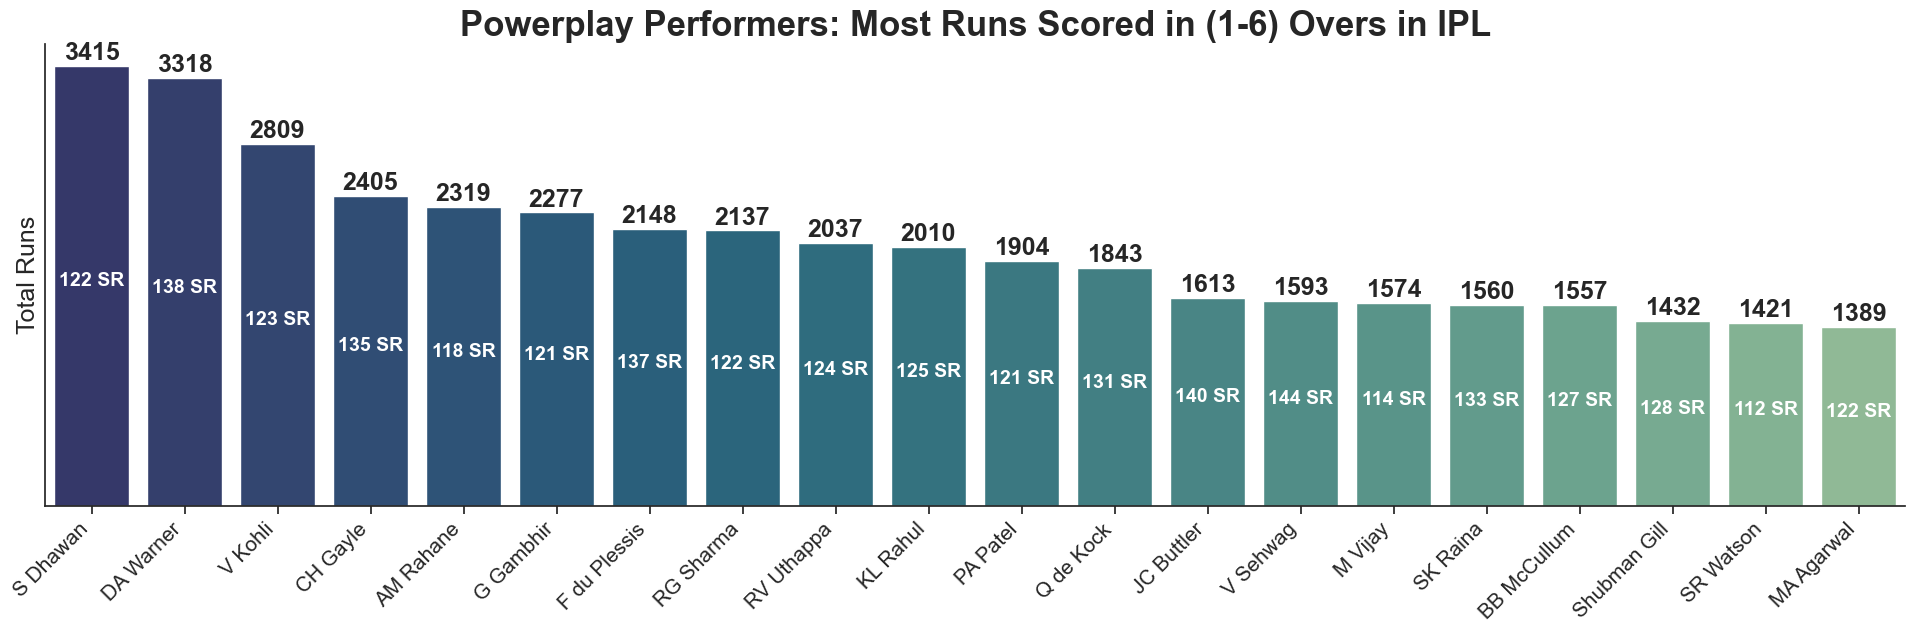

In [364]:
#Plotting Bar chart For Most Runs in Powerplay in IPL

palette = sns.color_palette("crest", as_cmap=True)
colors = palette(np.linspace(0.1, 1, len(df_powerplay_merged)))
plt.figure(figsize=(24,6))
sns.set_theme(style='ticks')
sns.barplot(data=df_powerplay_merged,x='batter',y='Total_Runs',palette=colors,hue='Total_Runs')
sns.despine()
plt.xlabel('')
plt.ylabel('Total Runs',fontsize=18)
plt.title('Powerplay Performers: Most Runs Scored in (1-6) Overs in IPL',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,rotation=45, ha='right')
plt.yticks([])
plt.legend().remove()
for i, row in enumerate(df_powerplay_merged.itertuples()):
    plt.text(i,row.Total_Runs+50,f"{int(row.Total_Runs)}",ha='center',fontweight='bold',fontsize=18)
    plt.text(i, row.Total_Runs * 0.5, f"{int(row.Strike_Rate)} SR", 
             ha='center', color='white', fontweight='bold', fontsize=14)

##  Powerplay Performers: Analyzing Top Run-Scorers (Overs 1–6)

The Powerplay overs (1–6) are where openers set the tone for their teams, balancing aggression with risk.  
From the chart, **Shikhar Dhawan** emerges as the most consistent Powerplay performer, scoring an impressive **3415 runs** a testament to his ability to anchor the innings while rotating strike efficiently (SR 122).  

Right behind him, **David Warner** dominates with **3318 runs at a strike rate of 138**, showing his aggressive intent and effectiveness against the new ball.  
**Virat Kohli** maintains balance, contributing **2809 runs (SR 123)** with steady scoring across multiple seasons.

Power hitters like **Chris Gayle (SR 135)** and **Faf du Plessis (SR 137)** stand out for their explosive yet calculated approach in early overs.  
Meanwhile, traditional openers such as **Ajinkya Rahane** and **Gautam Gambhir** show solid contributions built on stability rather than acceleration.

In contrast, players like **Virender Sehwag (SR 144)** and **Jos Buttler (SR 140)** may not have the highest aggregates but boast exceptional strike rates, indicating their ability to change games within a few overs.

Overall, the data highlights two clear archetypes of Powerplay specialists:
- **Consistent Anchors:** Shikhar Dhawan, Virat Kohli, Rahane, Gambhir  
- **Explosive Starters:** Warner, Gayle, Sehwag, Buttler, Faf du Plessis  

This balance between stability and aggression underlines why these players have been instrumental in giving their teams strong starts in the IPL.


---


Text(128.66, 47.19, 'Shubman Gill')

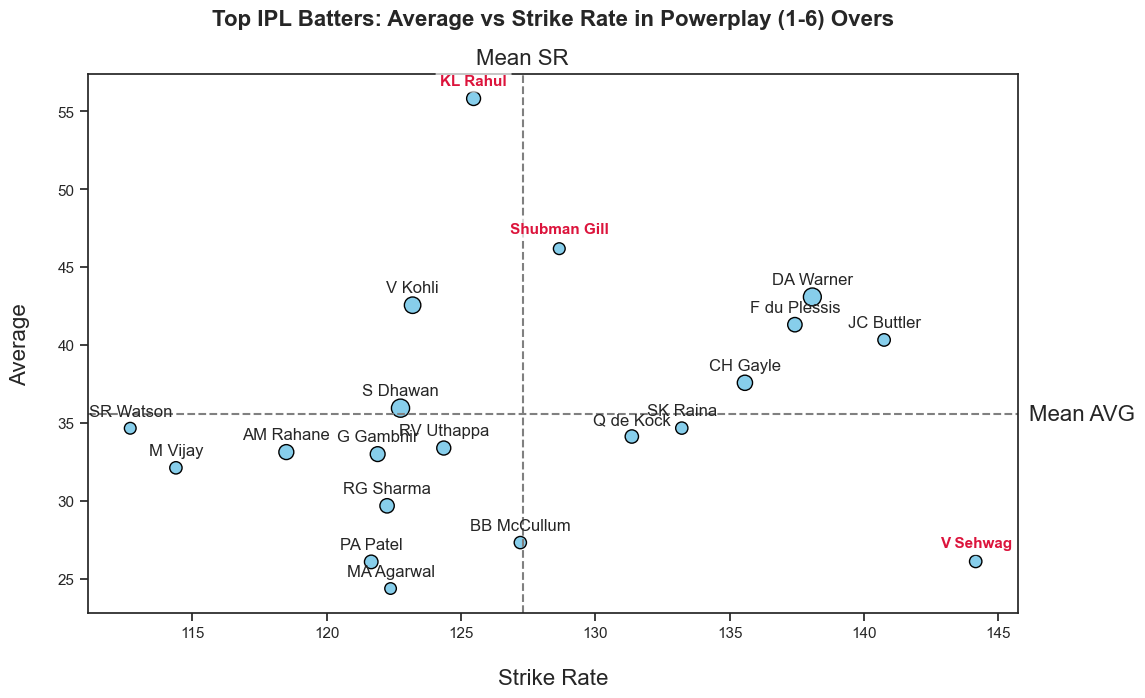

In [366]:
#Plotting SR vs AVG for Top 20 Runs Scorers in Powerplay

Mean_AVG_Powerplay=df_powerplay_merged_avg['Average'].mean()
Mean_SR_Powerplay=df_powerplay_merged_avg['Strike_Rate'].mean()
plt.figure(figsize=(12,7))
plt.scatter(
    df_powerplay_merged_avg['Strike_Rate'],
    df_powerplay_merged_avg['Average'],
    df_powerplay_merged_avg['Total_Runs']/20,
    c='skyblue',
    edgecolor='black',
    )

plt.axhline(Mean_AVG_Powerplay,linestyle='--',color='gray')
plt.axvline(Mean_SR_Powerplay,linestyle='--',color='gray')
plt.text(Mean_SR_Powerplay,df_powerplay_merged_avg['Average'].max() + 2.2,'Mean SR',ha='center',fontsize=16)
plt.text(df_powerplay_merged_avg['Strike_Rate'].max() + 2,Mean_AVG_Powerplay,'Mean AVG',va='center',fontsize=16)
plt.title('Top IPL Batters: Average vs Strike Rate in Powerplay (1-6) Overs',pad=35,fontsize=16,fontweight='bold')
plt.ylabel('Average',fontsize=16,labelpad=20)
plt.xlabel('Strike Rate',fontsize=16,labelpad=20)

skip=['KL Rahul','V Sehwag','Shubman Gill']
for i,name in enumerate(df_powerplay_merged_avg['batter']):
    if name in skip:
        continue
    else :
        plt.text(df_powerplay_merged_avg['Strike_Rate'].iloc[i],
             df_powerplay_merged_avg['Average'].iloc[i]+0.8,
             name,
             ha='center'
             )

plt.text(125.47,56.7,'KL Rahul', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))
plt.text(144.16,27,'V Sehwag', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))
plt.text(128.66,47.19,'Shubman Gill', fontsize=11, fontweight='bold', color='crimson',
         ha='center', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

##  Powerplay Dynamics: Average vs Strike Rate (Overs 1–6)

This scatter plot compares how top IPL batters balance **scoring consistency (Average)** and **aggression (Strike Rate)** during the Powerplay overs (1–6). The horizontal and vertical lines represent the **mean values** of Average and Strike Rate respectively, dividing the chart into four performance zones.

###  Key Outliers:
- **KL Rahul** – Stands out as a *statistical outlier* with the **highest average (~56)** while maintaining a solid strike rate around **125**. His risk-free, technically sound Powerplay batting gives him unmatched consistency.
- **Virender Sehwag** – Another extreme outlier on the opposite end, with a **strike rate of 144** but a much lower average (~26). He epitomizes the “go hard or go home” Powerplay approach.
- **Shubman Gill** – A modern anchor with a **high average (~46)** and an above-mean strike rate, showing his evolution into a reliable yet assertive Powerplay performer.

###  Performance Quadrants:
- **Top Right (High Avg, High SR):**  
  *David Warner, Faf du Plessis, Jos Buttler, Chris Gayle* — ideal Powerplay performers combining control and aggression, ensuring rapid starts without frequent dismissals.
  
- **Top Left (High Avg, Low SR):**  
  *KL Rahul, Virat Kohli, Shubman Gill* — consistent accumulators who minimize risk, anchoring the innings but sometimes criticized for slower starts.
  
- **Bottom Right (Low Avg, High SR):**  
  *Virender Sehwag, Quinton de Kock, Suresh Raina* — aggressive openers who provide explosive starts but are prone to early dismissals.
  
- **Bottom Left (Low Avg, Low SR):**  
  *Rohit Sharma, Ajinkya Rahane, Parthiv Patel* — more conservative or inconsistent Powerplay batters with neither standout aggression nor average.

 ---

